In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import glob
import random

In [2]:
imgs = glob.glob('./dataset/*.png')
random.shuffle(imgs)
imgs

['./dataset\\g7gnf.png',
 './dataset\\pg2pm.png',
 './dataset\\dmw8n.png',
 './dataset\\56c34.png',
 './dataset\\33b22.png',
 './dataset\\24f6w.png',
 './dataset\\pwn5e.png',
 './dataset\\ncfgb.png',
 './dataset\\8y63f.png',
 './dataset\\gw53m.png',
 './dataset\\2gyb6.png',
 './dataset\\53mn8.png',
 './dataset\\gc83b.png',
 './dataset\\cnwyc.png',
 './dataset\\p8ngx.png',
 './dataset\\ewnx8.png',
 './dataset\\47e4p.png',
 './dataset\\3ndxd.png',
 './dataset\\yf424.png',
 './dataset\\c2pg6.png',
 './dataset\\36bc2.png',
 './dataset\\8n34n.png',
 './dataset\\5n245.png',
 './dataset\\e7nx4.png',
 './dataset\\474ff.png',
 './dataset\\efx34.png',
 './dataset\\nnfx3.png',
 './dataset\\w8f36.png',
 './dataset\\5xd2e.png',
 './dataset\\wdww8.png',
 './dataset\\xfg65.png',
 './dataset\\be6np.png',
 './dataset\\neecd.png',
 './dataset\\xnd3y.png',
 './dataset\\25m6p.png',
 './dataset\\w2n7e.png',
 './dataset\\nbwnn.png',
 './dataset\\33n73.png',
 './dataset\\5wddw.png',
 './dataset\\43gey.png',


In [3]:
list(imgs[0].split(os.path.sep)[-1].split('.png')[0])

['g', '7', 'g', 'n', 'f']

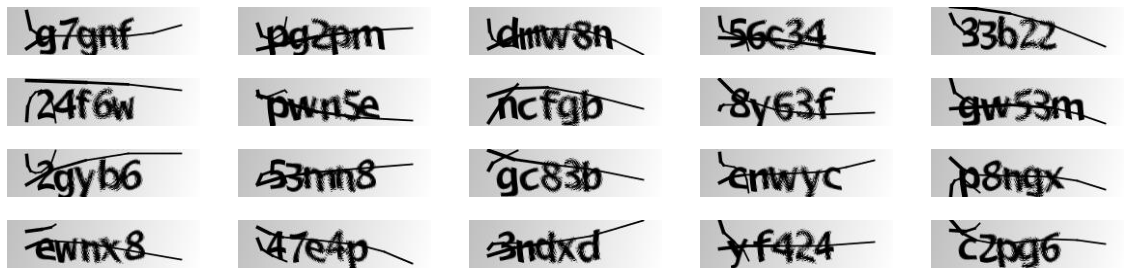

In [4]:
import cv2
plt.figure(figsize=(20, 5))
for i in range(20):
    img = cv2.imread(imgs[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')

In [5]:
df = pd.DataFrame(columns=['filename','extension','label','labelsize','char1','char2','char3','char4','char5'])

In [6]:
i = 0
for _, _, files in os.walk('./dataset'):
    for f in files:
        df.loc[i,'filename'] = f
        df.loc[i,'extension'] = f.split('.')[1]
        df.loc[i,'label'] = f.split('.')[0]
        df.loc[i,'labelsize'] = len(f.split('.')[0])
        df.loc[i,'char1'] = f.split('.')[0][0]
        df.loc[i,'char2'] = f.split('.')[0][1]
        df.loc[i,'char3'] = f.split('.')[0][2]
        df.loc[i,'char4'] = f.split('.')[0][3]
        df.loc[i,'char5'] = f.split('.')[0][4]
        i = i+1

In [7]:
df

,filename,extension,label,labelsize,char1,char2,char3,char4,char5
0,226md.png,png,226md,5,2,2,6,m,d
1,22d5n.png,png,22d5n,5,2,2,d,5,n
2,2356g.png,png,2356g,5,2,3,5,6,g
3,23mdg.png,png,23mdg,5,2,3,m,d,g
4,23n88.png,png,23n88,5,2,3,n,8,8
...,...,...,...,...,...,...,...,...,...
1065,yx2d4.png,png,yx2d4,5,y,x,2,d,4
1066,yxd7m.png,png,yxd7m,5,y,x,d,7,m
1067,yy824.png,png,yy824,5,y,y,8,2,4
1068,yyg5g.png,png,yyg5g,5,y,y,g,5,g


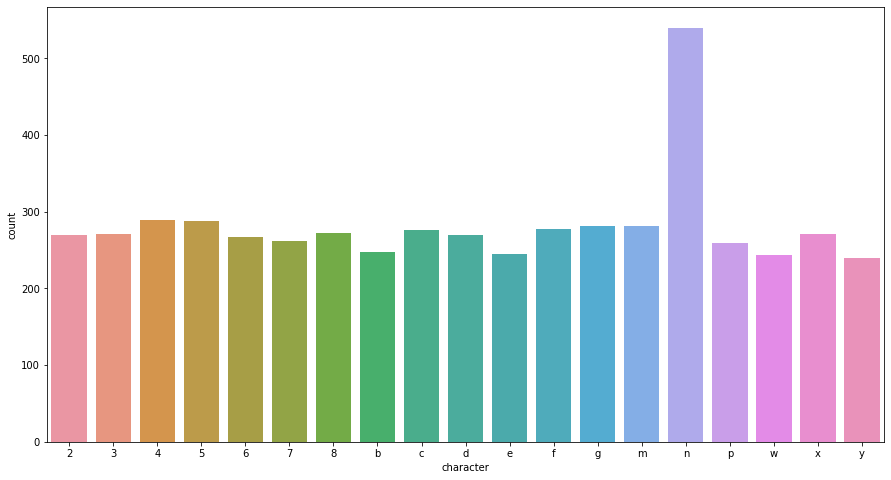

In [8]:
data = pd.DataFrame(df['char1'].value_counts()+df['char2'].value_counts()+df['char3'].value_counts()+df['char4'].value_counts()+df['char5'].value_counts()).reset_index()
data.columns = ['character','count']
plt.figure(figsize=(15, 8))
sns.barplot(data=data, x='character', y='count')
plt.show()

In [9]:
# Dictionaries that will be used to convert characters to integers and vice-versa
vocabulary = {'2','3','4','5','6','7','8','b','c','d','e','f','g','m','n','p','w','x','y'}
char_to_num = {'2':0,
               '3':1,
               '4':2,
               '5':3,
               '6':4,
               '7':5,
               '8':6,
               'b':7,
               'c':8,
               'd':9,
               'e':10,
               'f':11,
               'g':12,
               'm':13,
               'n':14,
               'p':15,
               'w':16,
               'x':17,
               'y':18}

In [10]:
img_data = []
labels = []
from tqdm import tqdm
for i in tqdm(range(len(imgs))):
    img = tf.io.read_file(imgs[i])
#     img = cv2.imread(imgs[i])
    img = tf.io.decode_png(img, channels=1)
    img = tf.image.convert_image_dtype(img, tf.float32)
#     img = tf.image.crop_to_bounding_box(img, offset_height=0, offset_width=25, target_height=50, target_width=125)
    img = tf.image.resize(img,size=[50,200],method='bilinear', preserve_aspect_ratio=False,antialias=False, name=None)
    img = tf.transpose(img, perm=[1, 0, 2])
    label = list(map(lambda x:char_to_num[x], imgs[i].split(os.path.sep)[-1].split('.')[0]))
    img_data.append(img)
    labels.append(label)

100%|████████████████████████████████████████████████████████████████████████████| 1040/1040 [00:00<00:00, 1064.81it/s]


In [11]:
len(img_data)

1040

In [12]:
len(labels)

1040

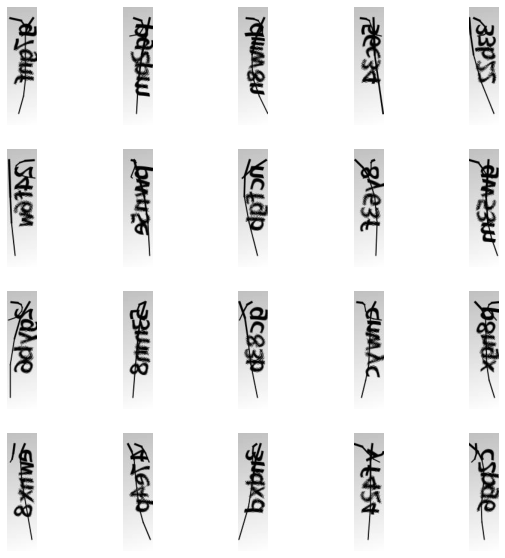

In [13]:
plt.figure(figsize=(10, 10))
for i in range(20):
#     img = cv2.imread(img_data[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img_data[i], cmap='gray')
    plt.axis('off')

In [14]:
img_data

[<tf.Tensor: shape=(200, 50, 1), dtype=float32, numpy=
 array([[[0.75294125],
         [0.75294125],
         [0.75294125],
         ...,
         [0.76470596],
         [0.76470596],
         [0.76470596]],
 
        [[0.75294125],
         [0.75294125],
         [0.75294125],
         ...,
         [0.76470596],
         [0.76470596],
         [0.76470596]],
 
        [[0.75294125],
         [0.75294125],
         [0.75294125],
         ...,
         [0.76470596],
         [0.76470596],
         [0.76470596]],
 
        ...,
 
        [[0.9843138 ],
         [0.9843138 ],
         [0.9843138 ],
         ...,
         [0.9960785 ],
         [0.9960785 ],
         [0.9960785 ]],
 
        [[0.9843138 ],
         [0.9843138 ],
         [0.9843138 ],
         ...,
         [0.9960785 ],
         [0.9960785 ],
         [0.9960785 ]],
 
        [[0.9843138 ],
         [0.9843138 ],
         [0.9843138 ],
         ...,
         [0.9960785 ],
         [0.9960785 ],
         [0.9960785 ]]], d

In [15]:
labels

[[12, 5, 12, 14, 11],
 [15, 12, 0, 15, 13],
 [9, 13, 16, 6, 14],
 [3, 4, 8, 1, 2],
 [1, 1, 7, 0, 0],
 [0, 2, 11, 4, 16],
 [15, 16, 14, 3, 10],
 [14, 8, 11, 12, 7],
 [6, 18, 4, 1, 11],
 [12, 16, 3, 1, 13],
 [0, 12, 18, 7, 4],
 [3, 1, 13, 14, 6],
 [12, 8, 6, 1, 7],
 [8, 14, 16, 18, 8],
 [15, 6, 14, 12, 17],
 [10, 16, 14, 17, 6],
 [2, 5, 10, 2, 15],
 [1, 14, 9, 17, 9],
 [18, 11, 2, 0, 2],
 [8, 0, 15, 12, 4],
 [1, 4, 7, 8, 0],
 [6, 14, 1, 2, 14],
 [3, 14, 0, 2, 3],
 [10, 5, 14, 17, 2],
 [2, 5, 2, 11, 11],
 [10, 11, 17, 1, 2],
 [14, 14, 11, 17, 1],
 [16, 6, 11, 1, 4],
 [3, 17, 9, 0, 10],
 [16, 9, 16, 16, 6],
 [17, 11, 12, 4, 3],
 [7, 10, 4, 14, 15],
 [14, 10, 10, 8, 9],
 [17, 14, 9, 1, 18],
 [0, 3, 13, 4, 15],
 [16, 0, 14, 5, 10],
 [14, 7, 16, 14, 14],
 [1, 1, 14, 5, 1],
 [3, 16, 9, 9, 16],
 [2, 1, 12, 10, 18],
 [8, 11, 16, 4, 10],
 [12, 18, 2, 1, 1],
 [17, 3, 14, 18, 14],
 [0, 6, 1, 2, 6],
 [1, 1, 11, 5, 13],
 [9, 14, 0, 18, 13],
 [4, 1, 6, 0, 2],
 [14, 10, 1, 0, 3],
 [0, 16, 2, 18, 5],
 [

In [16]:
img_data = np.array(img_data)
labels = np.array(labels)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(img_data, labels, test_size=0.2, shuffle=True, random_state=42)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42)

In [19]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(665, 200, 50, 1) (665, 5)
(208, 200, 50, 1) (208, 5)
(167, 200, 50, 1) (167, 5)


In [20]:
# Let's create a new CTCLayer by subclassing
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred

def build_model():
    
    # Inputs to the model
    input_img = layers.Input(shape=(200,50,1), name="image", dtype="float32") 
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(32,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv1")(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(64,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv2")(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model 
    x = layers.Reshape(target_shape=(50, 768), name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(20, activation="softmax", name="dense2")(x) # 20 = 19 characters + UKN

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(inputs=[input_img, labels], outputs=output, name="ocr_cnn_lstm_model")
    
    # Compile the model and return
    model.compile(optimizer=keras.optimizers.Adam())
    return model

In [21]:
# Get the model
import warnings
warnings.filterwarnings('ignore')
model = build_model()
model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "ocr_cnn_lstm_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 200, 50, 1)] 0                                            
___________________________________________________________________________

In [22]:
history = model.fit([X_train, y_train], validation_data=[X_val, y_val], epochs=30)

Epoch 1/30
21/21 [==============================] - 8s 372ms/step - loss: 26.0004 - val_loss: 16.6979
Epoch 2/30
21/21 [==============================] - 6s 296ms/step - loss: 16.3942 - val_loss: 16.4015
Epoch 3/30
21/21 [==============================] - 6s 298ms/step - loss: 16.3012 - val_loss: 16.3771
Epoch 4/30
21/21 [==============================] - 6s 300ms/step - loss: 16.2872 - val_loss: 16.3839
Epoch 5/30
21/21 [==============================] - 6s 304ms/step - loss: 16.2872 - val_loss: 16.3894
Epoch 6/30
21/21 [==============================] - 6s 307ms/step - loss: 16.2869 - val_loss: 16.4081
Epoch 7/30
21/21 [==============================] - 6s 308ms/step - loss: 16.2899 - val_loss: 16.3980
Epoch 8/30
21/21 [==============================] - 6s 307ms/step - loss: 16.2932 - val_loss: 16.3827
Epoch 9/30
21/21 [==============================] - 7s 311ms/step - loss: 16.2849 - val_loss: 16.3879
Epoch 10/30
21/21 [==============================] - 7s 322ms/step - loss: 16.2758

In [23]:
model.evaluate([X_val, y_val])

7/7 [==============================] - 0s 61ms/step - loss: 2.7481


2.748061180114746

In [24]:
model.evaluate([X_test, y_test])

6/6 [==============================] - 0s 63ms/step - loss: 2.7312


2.731224536895752

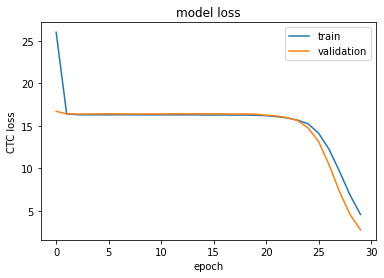

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('CTC loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()